In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

## K-means clustering

In [ ]:
img = cv2.imread("dog.jpeg")
img.shape

(178, 283, 3)

In [ ]:
all_pixels = img.reshape((-1, 3))
all_pixels.shape

(50374, 3)

In [ ]:
# initializing K centroids among all pixels in the image randomly at first
k = 3
random_indices = random.sample(range(all_pixels.shape[0]), k)
centroids = all_pixels[random_indices]
centroids

array([[ 43, 120, 189],
       [ 18,  26,  26],
       [112, 124, 128]], dtype=uint8)

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a-b) ** 2))

In [ ]:
def assign_pixels_to_centroids(pixels, centroids):
    labels = np.zeros(pixels.shape[0])
    for i, pixel in enumerate(pixels):
        distances = np.array([euclidean_distance(pixel, centroid) for centroid in centroids])
        labels[i] = np.argmin(distances)
    return labels

In [ ]:
labels = assign_pixels_to_centroids(all_pixels, centroids)
labels

array([1., 1., 1., ..., 1., 2., 2.])

In [ ]:
np.unique(labels)

array([0., 1., 2.])

In [ ]:
all_pixels[False].shape, all_pixels.shape

((0, 50374, 3), (50374, 3))

In [ ]:
# getting the pixels that are in certain clusters, to take their mean for new centroid
all_pixels[(labels==2)].shape, all_pixels[(labels==1)].shape, all_pixels[(labels==0)].shape

((16051, 3), (18200, 3), (16123, 3))

In [ ]:
def update_centroids(pixels, labels, k):
    new_centroids = np.zeros((k, 3))
    for i in range(k):
        cluster_pixels = pixels[labels==i]
        if len(cluster_pixels)>0:
            new_centroids[i] = np.mean(cluster_pixels, axis=0)
    return new_centroids

In [ ]:
new_centroids = update_centroids(all_pixels, labels, k)
new_centroids

array([[130.24542579, 141.50307015, 143.74750357],
       [119.30489011, 129.80148352, 131.16148352],
       [119.98274251, 130.46483085, 132.13737462]])

In [ ]:
all_pixels.shape, centroids

((50374, 3),
 array([[ 43, 120, 189],
        [ 18,  26,  26],
        [112, 124, 128]], dtype=uint8))

In [ ]:
%%time
# iterating this process multiple times
iterations = 100
tolerance = 0.00001 # 1e-5
for _ in range(iterations):
    labels = assign_pixels_to_centroids(all_pixels, centroids) # randomly generated centroids in the beginning
    new_centroids = update_centroids(all_pixels, labels, k)

    # difference between old and new centroids, to check for convergence
    if np.all(np.abs(new_centroids-centroids))<tolerance:
        break
    centroids = new_centroids


CPU times: user 19.7 s, sys: 465 ms, total: 20.2 s
Wall time: 20.1 s


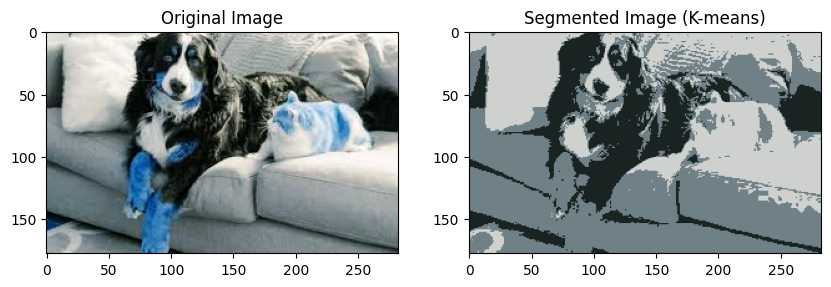

In [ ]:
segmented_pixels = centroids[labels.astype(int)]  # Replace each pixel with its centroid's color
segmented_image = segmented_pixels.reshape(img.shape)  # Reshape back to the original image shape

# 8. Display the original and segmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)

# Segmented image
plt.subplot(1, 2, 2)
plt.title('Segmented Image (K-means)')
plt.imshow(segmented_image.astype(int))  # Convert to int for proper display

plt.show()

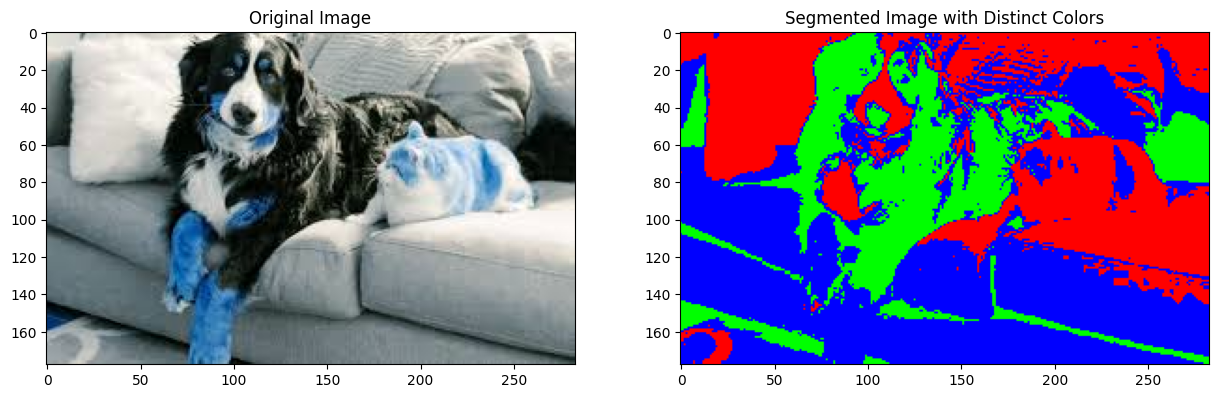

In [ ]:
distinct_colors = [
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
    [255, 0, 255],  # Magenta
    [0, 255, 255],  # Cyan
]

# Ensure we have enough distinct colors for the clusters
distinct_colors = distinct_colors[:k]  # Limit to K clusters

# Map labels to distinct colors
segmented_pixels = np.array([distinct_colors[int(label)] for label in labels])

# Reshape back to the original image shape
segmented_image_distinct = segmented_pixels.reshape(img.shape)

# 8. Display the original and segmented images
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)

# Segmented image with distinct colors
plt.subplot(1, 2, 2)
plt.title('Segmented Image with Distinct Colors')
plt.imshow(segmented_image_distinct.astype(int))

plt.show()